<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-.groupby()-without-DateTime-Index" data-toc-modified-id="Using-.groupby()-without-DateTime-Index-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using .groupby() without DateTime Index</a></span></li><li><span><a href="#Using-.loc[-]" data-toc-modified-id="Using-.loc[-]-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using .loc[ ]</a></span></li><li><span><a href="#Using-Date-Parts" data-toc-modified-id="Using-Date-Parts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using Date Parts</a></span></li><li><span><a href="#Using-.groupby()-with-DateTime-Index" data-toc-modified-id="Using-.groupby()-with-DateTime-Index-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using .groupby() with DateTime Index</a></span></li></ul></div>

In [32]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

import requests
import os
from datetime import timedelta, datetime as dt

import warnings
warnings.filterwarnings("ignore")

import acquire_walkthrough

In [2]:
df = acquire_walkthrough.get_store_data()
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


In [3]:
df.shape

(913000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_id        913000 non-null  int64  
 2   store_address  913000 non-null  object 
 3   store_city     913000 non-null  object 
 4   store_id       913000 non-null  int64  
 5   store_state    913000 non-null  object 
 6   store_zipcode  913000 non-null  int64  
 7   item_brand     913000 non-null  object 
 8   item_id        913000 non-null  int64  
 9   item_name      913000 non-null  object 
 10  item_price     913000 non-null  float64
 11  item_upc12     913000 non-null  int64  
 12  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ MB


In [5]:
# We have 1826 unique dates in the DateTime Index

df.index.nunique()

1826

In [6]:
# Jan 1, 2013 first day in dataset

df.index.min()

Timestamp('2013-01-01 00:00:00+0000', tz='UTC')

In [7]:
# Dec 31, 2017 last day in dataset

df.index.max()

Timestamp('2017-12-31 00:00:00+0000', tz='UTC')

In [8]:
timedelta(df.index.nunique())

datetime.timedelta(days=1826)

In [9]:
# Each of 10 store_ids has the an equal number of observations

df.store_id.value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store_id, dtype: int64

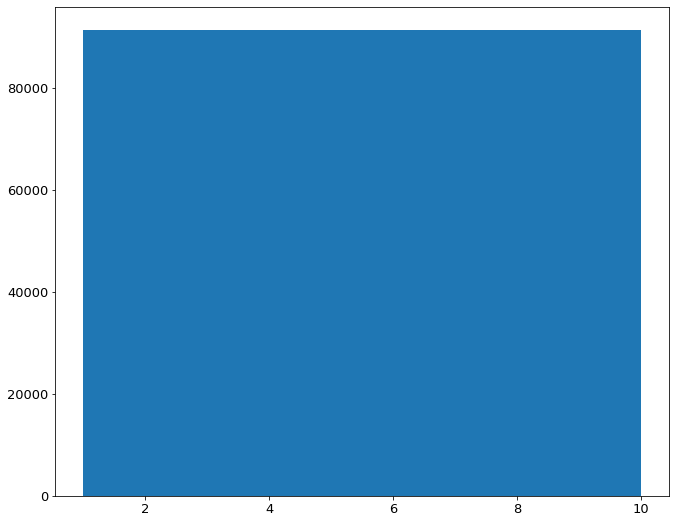

In [10]:
plt.hist(df.store_id)
plt.show()

In [11]:
# There are 50 unique items in our dataset

df.item_id.nunique()

50

In [12]:
# It looks like equal numbers of sales of each item

df.item_id.value_counts().describe()

count       50.0
mean     18260.0
std          0.0
min      18260.0
25%      18260.0
50%      18260.0
75%      18260.0
max      18260.0
Name: item_id, dtype: float64

## Using .groupby() without DateTime Index

In [13]:
# This tells us each store sold one of each item on the first day of the dataset

first_sale_per_storeitem = df.reset_index().groupby(['store_id','item_id']).sale_date.min()
print(f'{len(first_sale_per_storeitem)} = 10 stores x 50 items')
first_sale_per_storeitem[-15:]

500 = 10 stores x 50 items


store_id  item_id
10        36        2013-01-01 00:00:00+00:00
          37        2013-01-01 00:00:00+00:00
          38        2013-01-01 00:00:00+00:00
          39        2013-01-01 00:00:00+00:00
          40        2013-01-01 00:00:00+00:00
          41        2013-01-01 00:00:00+00:00
          42        2013-01-01 00:00:00+00:00
          43        2013-01-01 00:00:00+00:00
          44        2013-01-01 00:00:00+00:00
          45        2013-01-01 00:00:00+00:00
          46        2013-01-01 00:00:00+00:00
          47        2013-01-01 00:00:00+00:00
          48        2013-01-01 00:00:00+00:00
          49        2013-01-01 00:00:00+00:00
          50        2013-01-01 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, UTC]

In [14]:
# This tells us each store sold one of each item on the last day of the dataset

last_sale_per_storeitem = df.reset_index().groupby(['store_id','item_id']).sale_date.max()
print(f'{len(last_sale_per_storeitem)} = 10 stores x 50 items')
last_sale_per_storeitem[-15:]

500 = 10 stores x 50 items


store_id  item_id
10        36        2017-12-31 00:00:00+00:00
          37        2017-12-31 00:00:00+00:00
          38        2017-12-31 00:00:00+00:00
          39        2017-12-31 00:00:00+00:00
          40        2017-12-31 00:00:00+00:00
          41        2017-12-31 00:00:00+00:00
          42        2017-12-31 00:00:00+00:00
          43        2017-12-31 00:00:00+00:00
          44        2017-12-31 00:00:00+00:00
          45        2017-12-31 00:00:00+00:00
          46        2017-12-31 00:00:00+00:00
          47        2017-12-31 00:00:00+00:00
          48        2017-12-31 00:00:00+00:00
          49        2017-12-31 00:00:00+00:00
          50        2017-12-31 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, UTC]

In [15]:
# This tells us each store sold at least one of each item each day in the dataset

days_per_storeitem = df.reset_index().groupby(['store_id','item_id']).sale_date.nunique()

days_per_storeitem.unique()

array([1826])

## Using .loc[ ]

In [16]:
# .loc indexes using a string, so we can pass a specific date and return those rows
# We see this date returns 500 rows, 10 stores, 50 items, 1 day = 500 observations

print(len(df.loc['2016-02-03']))
df.loc['2016-02-03'].head(3)

500


,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2016-02-03 00:00:00+00:00,28.0,41301,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139
2016-02-03 00:00:00+00:00,16.0,742485,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,P.f. Changs,41,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016
2016-02-03 00:00:00+00:00,24.0,733355,9255 FM 471 West,San Antonio,2,TX,78251,P.f. Changs,41,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016


In [17]:
# Select a month, 14_000 observations in February of 2013

print(len(df.loc['2013-02']))
df.loc['2013-02'].head(3)

14000


,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-02-01 00:00:00+00:00,22.0,36552,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139
2013-02-01 00:00:00+00:00,40.0,858252,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Dove,48,Dove Men + Care Antiperspirant Deodorant Cool ...,3.72,79400271631,79400271631
2013-02-01 00:00:00+00:00,27.0,832688,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664


In [18]:
# Select a date range like a year, 183_500 observations in this particular year

print(len(df.loc['2016-02-03' : '2017-02-03']))
df.loc['2016-02-03' : '2017-02-03'].head(3)

183500


,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2016-02-03 00:00:00+00:00,28.0,41301,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139
2016-02-03 00:00:00+00:00,16.0,742485,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,P.f. Changs,41,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016
2016-02-03 00:00:00+00:00,24.0,733355,9255 FM 471 West,San Antonio,2,TX,78251,P.f. Changs,41,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016


## Using Date Parts

In [19]:
df['year'] = df.index.year
df.head(1)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,year
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013


In [41]:
df['month'] = df.index.month
df.head(1)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,year,month,weekday
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,Tuesday


In [42]:
# If you have upgraded your pandas, use .day_name(), if not, .weekday_name

pd.__version__

'1.0.3'

In [43]:
df['weekday'] = df.index.day_name()
df.head(1)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,year,month,weekday
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,Tuesday


In [44]:
# I want to convert some of these int64 to objects

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_id        913000 non-null  object 
 2   store_address  913000 non-null  object 
 3   store_city     913000 non-null  object 
 4   store_id       913000 non-null  object 
 5   store_state    913000 non-null  object 
 6   store_zipcode  913000 non-null  object 
 7   item_brand     913000 non-null  object 
 8   item_id        913000 non-null  object 
 9   item_name      913000 non-null  object 
 10  item_price     913000 non-null  float64
 11  item_upc12     913000 non-null  object 
 12  item_upc14     913000 non-null  object 
 13  year           913000 non-null  object 
 14  month          913000 non-null  int64  
 15  weekday        913000 non-null  object 
dtypes: float64(2), int64(1), obj

In [56]:
# now our only numeric columns are sale_amount and item_price

df = df.astype({'sale_id': object, 'store_id': object, 'store_zipcode': object, 'item_id': object, 'item_upc12': object, 'item_upc14': object, 'year': 'category', 'month': 'category', 'weekday': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   sale_amount    913000 non-null  float64 
 1   sale_id        913000 non-null  object  
 2   store_address  913000 non-null  object  
 3   store_city     913000 non-null  object  
 4   store_id       913000 non-null  object  
 5   store_state    913000 non-null  object  
 6   store_zipcode  913000 non-null  object  
 7   item_brand     913000 non-null  object  
 8   item_id        913000 non-null  object  
 9   item_name      913000 non-null  object  
 10  item_price     913000 non-null  float64 
 11  item_upc12     913000 non-null  object  
 12  item_upc14     913000 non-null  object  
 13  year           913000 non-null  category
 14  month          913000 non-null  category
 15  weekday        913000 non-null  category
dtypes: categor

## Using .groupby() with DateTime Index

In [46]:
df.groupby('sale_date').sale_amount.sum().head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-03 00:00:00+00:00    14488.0
2013-01-04 00:00:00+00:00    15677.0
2013-01-05 00:00:00+00:00    16237.0
Name: sale_amount, dtype: float64

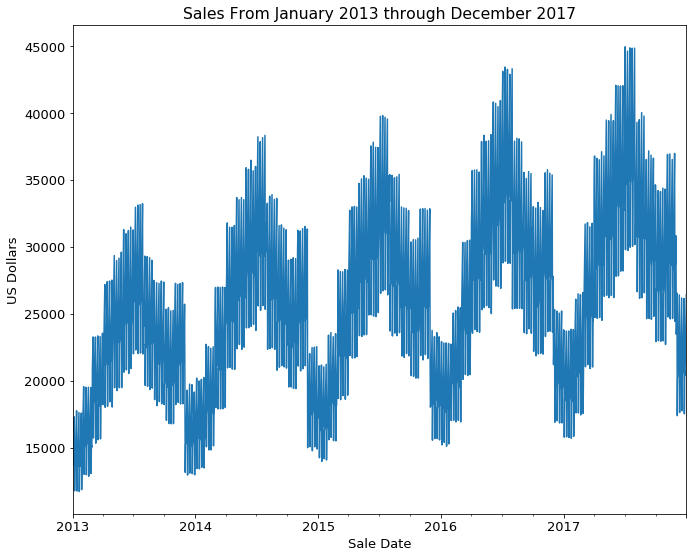

In [47]:
# Overall sales are trending upward from 2013 to 2017

df.groupby('sale_date').sale_amount.sum().plot()

plt.title('Sales From January 2013 through December 2017')
plt.xlabel('Sale Date')
plt.ylabel('US Dollars')
plt.show()

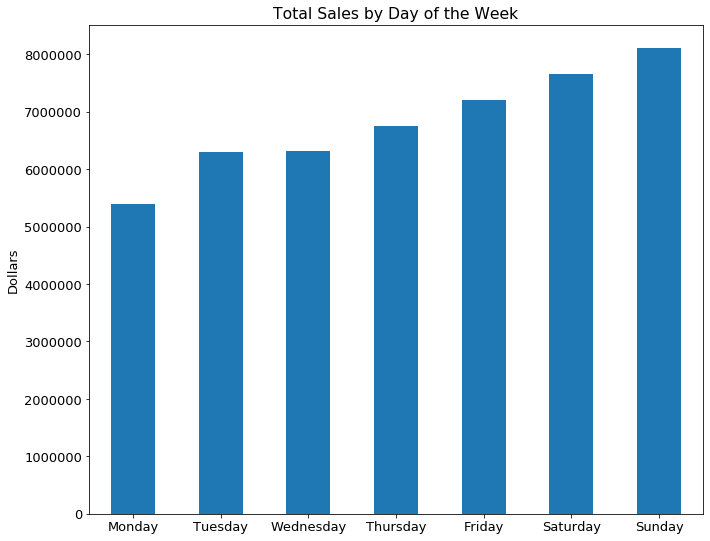

In [68]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby('weekday').sale_amount.sum().reindex(cats).plot(kind='bar')

plt.xlabel('')
plt.ylabel('Dollars')
plt.xticks(rotation=0)
plt.title('Total Sales by Day of the Week')
plt.show()

In [ ]:
df.groupby('store_id').sale_amount.sum().sort_values().plot.bar()

plt.xlabel('Store ID')
plt.ylabel('US Dollars')
plt.title('Total Sales by Store')
plt.xticks(rotation=0)
plt.show()

In [ ]:
gdf = acquire_walkthrough.german_energy_csv()
gdf.head()

In [ ]:
gdf.info()

In [ ]:
gdf.groupby('Date').Consumption.sum().plot()

In [ ]:
gdf[['Consumption', 'Wind+Solar']].asfreq('Q').plot()